# library

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

# Whole Code

In [9]:
propublica_data_url = 'https://github.com/propublica/compas-analysis/raw/master/compas-scores-two-years.csv'
df_pp = pd.read_csv(propublica_data_url,
                 header=0).set_index('id')

In [10]:
df_pp.head()

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


# Clean Code

In [12]:
clean_data_url = 'https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv'
df = pd.read_csv(clean_data_url,
                 header=0).set_index('id')

In [14]:
df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out,length_of_stay
id,,,,,,,,,,,,,,
3,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53,10
4,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1
8,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30,6
10,39,M,Caucasian,25 - 45,Low,Female,0,-1.0,1,0,0,2014-03-15 05:35:34,2014-03-18 04:28:46,2
14,27,F,Caucasian,25 - 45,Low,Male,0,-1.0,4,0,0,2013-11-25 06:31:06,2013-11-26 08:26:57,1


# Graph

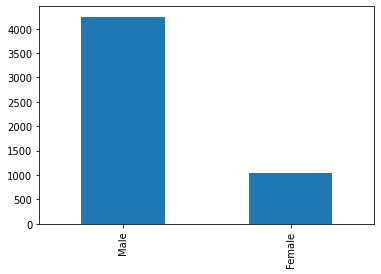

In [15]:
df['sex'].value_counts().plot(kind='bar')

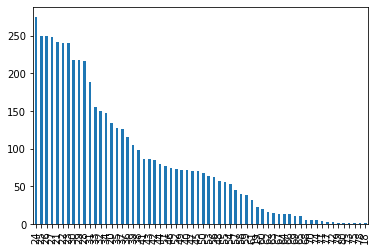

In [17]:
df['age'].value_counts().plot(kind='bar')

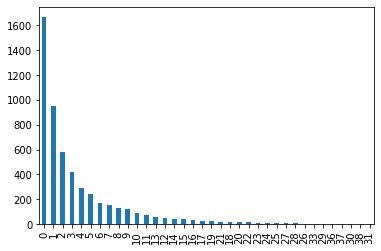

In [22]:
df['priors_count'].value_counts().plot(kind='bar')

In [19]:
df['two_year_recid'].value_counts()

0    2795
1    2483
Name: two_year_recid, dtype: int64

In [20]:
df['score_text'].value_counts()

Low       2753
Medium    1457
High      1068
Name: score_text, dtype: int64